In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


In [21]:
data_cols = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility','dew_point_temp','radiation','rain', 'snow', 'functional']
df = pd.read_csv("SeoulBikeData.csv", ).drop(['Date', 'Holiday', 'Seasons'], axis=1)
df.columns = data_cols
df['functional'] = (df['functional']=='Yes').astype(int)
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis=1)
df.head()


,bike_count,temp,humidity,wind,visibility,dew_point_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


make a plot

In [ ]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Bike count at noon")
    plt.show()

In [24]:
df = df.drop(['wind', 'visibility', 'functional'], axis=1)

In [25]:
df.head()

,bike_count,temp,humidity,dew_point_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


### Train/Test dataset

In [26]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/home/localdev/.local/share/virtualenvs/machine-learning-ztm-rPYay6DU/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [27]:
def get_xy(datafram, y_label, x_label=None):
    datafram = copy.deepcopy(datafram)
    if not x_label:
        X = datafram[[c for c in datafram.columns if c!=y_label]].values
    else:
        if len(x_label) == 1:
            X = datafram[x_label[0]].values.reshape(-1,1)
        else:
            X = datafram[x_label].values
    
    y = datafram[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y


In [30]:
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', x_label=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, 'bike_count', x_label=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', x_label=["temp"])

In [32]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [33]:
temp_reg.score(X_test_temp, y_test_temp)

0.2594739212055831

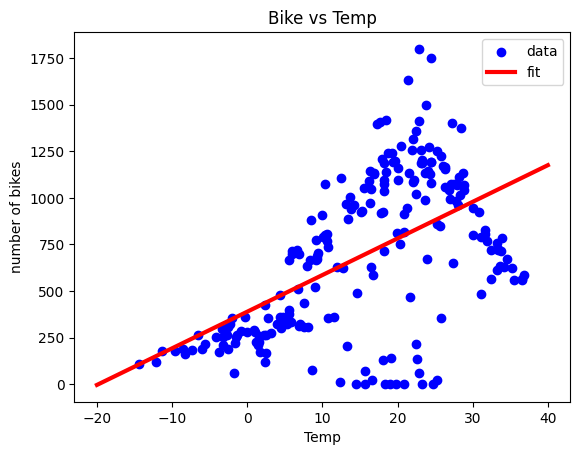

In [34]:
plt.scatter(X_train_temp, y_train_temp, label='data', color='blue')
x = tf.linspace(-20,40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1),), label='fit', color='red', linewidth=3)
plt.legend()
plt.title("Bike vs Temp")
plt.xlabel("Temp",)
plt.ylabel("number of bikes")
plt.show()